# Home Credit Default Risk - Kaggle Competition

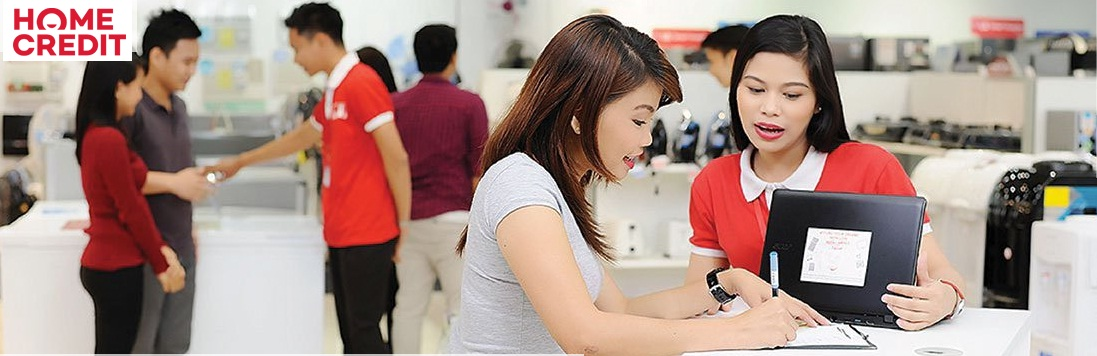

In [4]:
from IPython.display import Image
Image('Home_Credit.jpg')

## Table of Contents

1. [Loading Libraries](#lib)
2. [Loading Dataset Files](#files)
3. [Modeling](#modeling)     
    3.1 [Cross Validating Models](#cv)   
    3.2 [Hyperparameter Tunning](#tunning)  
    3.3 [Ensemble Modeling](#ensemble)   

## 1. Loading Libraries
<a id="lib"></a>

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.pipeline import _name_estimators
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.model_selection import learning_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.utils import resample

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

%matplotlib inline

## 2. Loading Dataset Files
<a id="files"></a>

In [466]:
train = pd.read_csv('Datasets/new_train.csv')
test = pd.read_csv('Datasets/new_test.csv')

In [467]:
train.head()

,TARGET,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,CNT_DAYS_OVERDUE_BUREAU,AMT_CREDIT_OVERDUE_BUREAU,CNT_CREDIT_PROLONG,CNT_ACOUNTS_HC,CNT_REFUSED_HC,CNT_DAYS_DELAYED_INSTALLMENT_HC,AMT_DEBT_INSTALLMENT_HC,AMT_DEBT_CREDIT_CARD_HC,CNT_DPD_CREDIT_CARD_HC,CNT_DPD_CASH_LOAN_HC
0,1,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0.0,0.0,0.0,1.0,0.0,0.0,0.000,0.0,0.0,0.0
1,0,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0.0,0.0,0.0,3.0,0.0,0.0,0.000,0.0,0.0,0.0
2,0,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0.0,0.0,0.0,1.0,0.0,0.0,0.000,0.0,0.0,0.0
3,0,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0.0,0.0,0.0,9.0,1.0,0.0,0.000,0.0,0.0,0.0
4,0,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0.0,0.0,0.0,6.0,0.0,0.0,-29857.365,0.0,0.0,0.0


In [468]:
test.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,CNT_DAYS_OVERDUE_BUREAU,AMT_CREDIT_OVERDUE_BUREAU,CNT_CREDIT_PROLONG,CNT_ACOUNTS_HC,CNT_REFUSED_HC,CNT_DAYS_DELAYED_INSTALLMENT_HC,AMT_DEBT_INSTALLMENT_HC,AMT_DEBT_CREDIT_CARD_HC,CNT_DPD_CREDIT_CARD_HC,CNT_DPD_CASH_LOAN_HC
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.000,0.00,0.0,7.0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.000,0.00,0.0,0.0
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,0.0,0.0,0.0,4.0,0.0,0.0,-179437.725,0.00,1.0,34.0
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0.0,0.0,0.0,5.0,0.0,0.0,-70348.230,-1065.24,0.0,0.0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.000,0.00,0.0,0.0


## 3. Modeling
<a id="modeling"></a>

### 3.1 Cross Validating Models
<a id="cv"></a>

In [574]:
# Spliting the training dataset into features and class labels
# Evaluating only 10% of the samples to increase computacional efficiency
y = train.iloc[:(int(len(train)*0.001)),0].values
X = train.iloc[:(int(len(train)*0.001)),1:].values

In [575]:
# Dealing with class unbalance
print('Number of class 1 samples before:', X[y == 1].shape[0])
X_upsampled, y_upsampled = resample(X[y == 1], y[y == 1], replace=True, n_samples=X[y == 0].shape[0], random_state=3)
print('Number of class 1 samples after:', X_upsampled.shape[0])

X = np.vstack((X[y == 0], X_upsampled))
y = np.hstack((y[y == 0], y_upsampled))

Number of class 1 samples before: 21
Number of class 1 samples after: 286


In [576]:
# Spliting into train and test dataset
random_state = 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=random_state)

In [577]:
# Training 7 different classifiers 
# Logistic Regression
clf1 = LogisticRegression(penalty='l2', C=0.001, random_state=random_state)
pipe_LR = make_pipeline(StandardScaler(),clf1)
scores_LR = cross_val_score(estimator=pipe_LR, X=X_train, y=y_train, cv=3, scoring='roc_auc', n_jobs=-1)                         
print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores_LR.mean(), scores_LR.std(), 'Logistic Regression'))

ROC AUC: 0.86 (+/- 0.08) [Logistic Regression]


In [508]:
# Decision Tree
clf2 = DecisionTreeClassifier(criterion='entropy', random_state=random_state)
pipe_DT = make_pipeline(StandardScaler(), clf2)
scores_DT = cross_val_score(estimator=pipe_DT, X=X_train, y=y_train, cv=3, scoring='roc_auc', n_jobs=-1)                         
print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores_DT.mean(), scores_DT.std(), 'Decision Tree'))

ROC AUC: 0.89 (+/- 0.02) [Decision Tree]


In [509]:
# Random Forest
clf3 = RandomForestClassifier(criterion ='entropy', random_state=random_state)
pipe_RF = make_pipeline(StandardScaler(), clf3)
scores_RF = cross_val_score(estimator=pipe_RF, X=X_train, y=y_train, cv=3, scoring='roc_auc', n_jobs=-1)                         
print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores_RF.mean(), scores_RF.std(), 'Random Forest'))

ROC AUC: 0.97 (+/- 0.03) [Random Forest]


In [547]:
# K-Nearest
clf4 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski', n_jobs=-1)
pipe_KN = make_pipeline(StandardScaler(), clf4)
scores_KN = cross_val_score(estimator=pipe_KN, X=X_train, y=y_train, cv=3, scoring='roc_auc', n_jobs=-1)                         
print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores_KN.mean(), scores_KN.std(), 'K-Nearest Neighor'))

ROC AUC: 0.92 (+/- 0.03) [K-Nearest Neighor]


In [511]:
# Supported Vector
clf5 = SVC(random_state=random_state, probability=True)
pipe_SVC = make_pipeline(StandardScaler(), clf5)
scores_SVC = cross_val_score(estimator=pipe_SVC, X=X_train, y=y_train, cv=3, scoring='roc_auc', n_jobs=-1)                         
print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores_SVC.mean(), scores_SVC.std(), 'Supported Vector'))

ROC AUC: 0.98 (+/- 0.02) [Supported Vector]


In [512]:
# Adaboost Desicion Tree
clf6 = AdaBoostClassifier(base_estimator=clf2, random_state=random_state, learning_rate=0.1)
pipe_ADA = make_pipeline(StandardScaler(), clf6)
scores_ADA = cross_val_score(estimator=pipe_ADA, X=X_train, y=y_train, cv=3, scoring='roc_auc', n_jobs=-1)                         
print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores_ADA.mean(), scores_ADA.std(), 'Adaboost Decision Tree'))

ROC AUC: 0.90 (+/- 0.03) [Adaboost Decision Tree]


In [513]:
# Bagging Decision Tree
clf7 = BaggingClassifier(base_estimator=clf2, random_state=random_state)
pipe_BAG = make_pipeline(StandardScaler(), clf7)
scores_BAG = cross_val_score(estimator=pipe_BAG, X=X_train, y=y_train, cv=3, scoring='roc_auc', n_jobs=-1)                         
print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores_BAG.mean(), scores_BAG.std(), 'Baggin Decision Tree'))

ROC AUC: 0.97 (+/- 0.03) [Baggin Decision Tree]


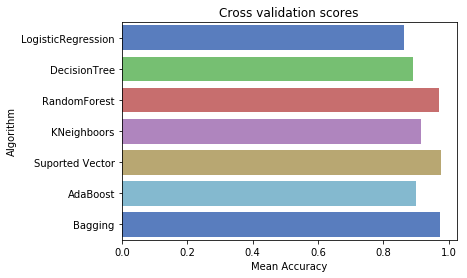

In [514]:
# Ploting the results of the classifiers
scores_means = [scores_LR.mean(), scores_DT.mean(), scores_RF.mean(), scores_KN.mean(), scores_SVC.mean(), 
                scores_ADA.mean(), scores_BAG.mean()]

cv_res = pd.DataFrame({"CrossValMeans":scores_means, "Algorithm":["LogisticRegression", "DecisionTree", 
                                                                  "RandomForest","KNeighboors", "Suported Vector", 
                                                                  "AdaBoost", "Bagging"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="muted",orient = "h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

I choose only 3 classifiers for the rest of the modeling. The exectuion of Supported Vector was computational too expensive, that's why I did not used this classifier on the full dataset.

### 3.2 Hyperparameter Tunning
<a id="tunning"></a>

In [582]:
# Spliting the full training dataset into features and class labels
y = train.iloc[:,0].values
X = train.iloc[:,1:].values

In [583]:
# Dealing with class unbalance
print('Number of class 1 samples before:', X[y == 1].shape[0])
X_upsampled, y_upsampled = resample(X[y == 1], y[y == 1], replace=True, n_samples=X[y == 0].shape[0], random_state=3)
print('Number of class 1 samples after:', X_upsampled.shape[0])

X = np.vstack((X[y == 0], X_upsampled))
y = np.hstack((y[y == 0], y_upsampled))

Number of class 1 samples before: 24825
Number of class 1 samples after: 282686


In [584]:
# Spliting into train and test dataset
random_state = 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=random_state)

In [524]:
# Using gridsearch for hyperparameter tunning
# Random Forest     
rf_param_grid = {"randomforestclassifier__max_depth": [None],"randomforestclassifier__max_features": [1, 3, 10],
                 "randomforestclassifier__min_samples_split": [2, 3, 10],
                 "randomforestclassifier__min_samples_leaf": [1, 3, 10],
                 "randomforestclassifier__bootstrap": [False],"randomforestclassifier__n_estimators" :[100,300],
                 "randomforestclassifier__criterion": ["gini"]}

gs_rf = GridSearchCV(estimator=pipe_RF,param_grid = rf_param_grid, cv=3, scoring="roc_auc", n_jobs= -1)
gs_rf = gs_rf.fit(X_train, y_train)
print("ROC AUC: %0.2f [%s]" % (gs_rf.best_score_, 'Gridsearch Random Forest'))
print(gs_rf.best_params_)
RF_best = gs_rf.best_estimator_

ROC AUC: 0.99 [Gridsearch Random Forest]
{'randomforestclassifier__bootstrap': False, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 10, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__n_estimators': 300}


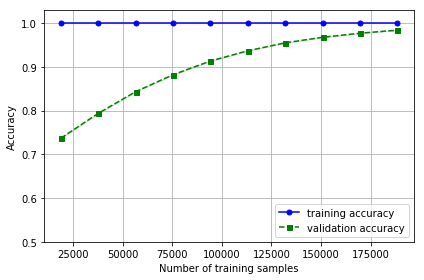

In [530]:
# Ploting the learning curve of the best Random Forest Classifier
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=RF_best,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=3,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.03])
plt.tight_layout()
plt.show()

Seems that the Random Forest Classifier has a good bias and variance trade-off.

In [551]:
# Using gridsearch for hyperparameter tunning
# K-Nearest
kn_param_grid = {"n_neighbors": range(1, 11),
                  "weights": ["uniform", "distance"],
                  "metric": ["euclidean", "manhattan", "chebyshev", "minkowski"]}

gs_kn = GridSearchCV(estimator=clf4,param_grid = kn_param_grid, cv=3, scoring="roc_auc", n_jobs= -1)
gs_kn = gs_kn.fit(X_train, y_train)
print("ROC AUC: %0.2f [%s]" % (gs_kn.best_score_, 'Gridsearch K-Nearest'))
print(gs_kn.best_params_)
KN_best = gs_kn.best_estimator_

ROC AUC: 0.98 [Gridsearch K-Nearest]
{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


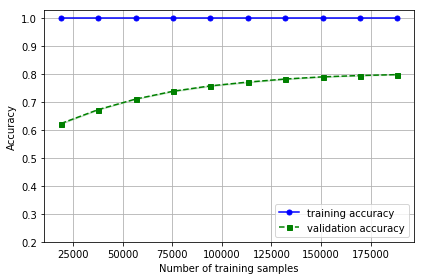

In [552]:
# Ploting the learning curve of the best K-Nearest Classifier
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=KN_best,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=3,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.2, 1.03])
plt.tight_layout()
plt.show()

Seems that the K-Nearest Classifier has a high variance, probably because it suffers from overfitting the of the training data

In [529]:
# Using gridsearch for hyperparameter tunning
# Bagging
bag_param_grid = {"baggingclassifier__max_features": [1, 3, 10],
                 "baggingclassifier__max_samples": [1, 3, 10],
                 "baggingclassifier__bootstrap": [False],"baggingclassifier__n_estimators" :[10, 100,300]}

gs_bag = GridSearchCV(estimator=pipe_BAG,param_grid=bag_param_grid, cv=3, scoring="roc_auc", n_jobs= -1)
gs_bag = gs_bag.fit(X_train, y_train)
print("ROC AUC: %0.2f [%s]" % (gs_bag.best_score_, 'Gridsearch Baggin Decision Tree'))
print(gs_bag.best_params_)
BAG_best = gs_bag.best_estimator_

ROC AUC: 0.64 [Gridsearch Baggin Decision Tree]
{'baggingclassifier__bootstrap': False, 'baggingclassifier__max_features': 10, 'baggingclassifier__max_samples': 10, 'baggingclassifier__n_estimators': 300}


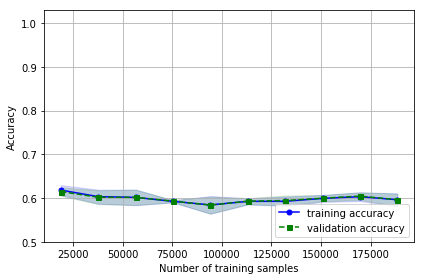

In [531]:
# Ploting the learning curve of the best Bagging Classifier
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=BAG_best,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=3,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.03])
plt.tight_layout()
plt.show()

Seems that the Bagging Classifier has a high bias, probably because it suffers from underfitting the training data.

### 3.2 Esemble Modeling
<a id="esemble"></a>

In [ ]:
# Using majority voting classifier with the three methods on the training dataset
votingC = VotingClassifier(estimators=[('RF', RF_best),
('KNN', KN_best), ('BAG', BAG_best)], voting='soft', n_jobs=4)

# Predicting the target value of the validation training dataset
votingC = votingC.fit(X, y)
y_pred = votingC.predict(X_test)

In [555]:
# Calculating missclassification validation training dataset
error = ((y_test!= y_pred)).sum()
percentage = error / len(y_test)
print("\nMissclassification test samples: %d" % error)
print("Missclassification percentage: %.4f" % percentage) 

# Calculating accuracy
print("Prediction accuracy: %.4f" % accuracy_score(y_test, y_pred))


Missclassification test samples: 0
Missclassification percentage: 0.0000
Prediction accuracy: 1.0000


In [556]:
# Predicting the target values of the clients on the test dataset
y_subm = votingC.predict_proba(test)

In [560]:
# Merging the SK_ID_CURR and the prediction for the submission file
subm = pd.DataFrame(columns=['SK_ID_CURR', 'TARGET'])
subm['SK_ID_CURR'] = test['SK_ID_CURR']
subm['TARGET'] = y_subm[:,0]

In [561]:
# Saving the predicted probability for target 1 of the test dataset into a submission CSV file
subm.to_csv('home_credit_subm.csv', index = False)

In [562]:
pd.read_csv('home_credit_subm.csv')

,SK_ID_CURR,TARGET
0,100001,0.521852
1,100005,0.755102
2,100013,0.810528
3,100028,0.829247
4,100038,0.806191
5,100042,0.825247
6,100057,0.566426
7,100065,0.602689
8,100066,0.613719
9,100067,0.779914
